In [1]:
import numpy as np
import pandas as pd

In [2]:
import spacy
import en_core_web_lg
#nlp = spacy.load('en_core_web_lg')
nlp = en_core_web_lg.load()

In [3]:
df = pd.read_csv(r"C:\Users\Sid\Downloads\Full_Data_Sets_EMC\Advisory_2015_2019c.csv",
                 encoding = "ISO-8859-1",error_bad_lines=False)
df

,FROM_DISPATCH_DATE,FROM_DISPATCH_PERIOD,TO_DISPATCH_DATE,TO_DISPATCH_PERIOD,CONDITION_DESCRIPTION,A,B,C,D,E,F,G,H,I,J,K
0,02-Jan-15,23,02-Jan-15,23.0,Outage of Paya Lebar I/Kaki Bukit 66kV Feeder ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-Jan-15,39,06-Jan-15,41.0,Fuel changeover test of Generating Unit SNKCCP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-Jan-15,39,06-Jan-15,41.0,Fuel changeover test of Generating Unit SNKCCP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07-Jan-15,39,07-Jan-15,40.0,Fuel changeover test of Generating Unit SER CC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07-Jan-15,39,07-Jan-15,41.0,Fuel changeover test of Generating Unit SER CC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,27-Dec-19,42,27-Dec-19,42.0,Forced outage of generating unit KMCBLK4 at 39...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4448,27-Dec-19,42,27-Dec-19,42.0,Activate scheduled contingency reserve from Lo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4449,27-Dec-19,42,27-Dec-19,44.0,Load interrupted can be restored with immediat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4450,30-Dec-19,1,07-Jan-20,48.0,Outage of Generating Unit KMCBLK4 on 30 Dec 20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()
#df.info()
df = df.drop(["A","B","C","D","E","F","G","H","I","J","K"],axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4452 entries, 0 to 4451
Data columns (total 5 columns):
FROM_DISPATCH_DATE       4107 non-null object
FROM_DISPATCH_PERIOD     3965 non-null object
TO_DISPATCH_DATE         3964 non-null object
TO_DISPATCH_PERIOD       3964 non-null float64
CONDITION_DESCRIPTION    3943 non-null object
dtypes: float64(1), object(4)
memory usage: 174.0+ KB


In [5]:
df.CONDITION_DESCRIPTION

0       Outage of Paya Lebar I/Kaki Bukit 66kV Feeder ...
1       Fuel changeover test of Generating Unit SNKCCP...
2       Fuel changeover test of Generating Unit SNKCCP...
3       Fuel changeover test of Generating Unit SER CC...
4       Fuel changeover test of Generating Unit SER CC...
                              ...                        
4447    Forced outage of generating unit KMCBLK4 at 39...
4448    Activate scheduled contingency reserve from Lo...
4449    Load interrupted can be restored with immediat...
4450    Outage of Generating Unit KMCBLK4 on 30 Dec 20...
4451    Outage of Generating Unit SNKCCP2 on 30 Dec 20...
Name: CONDITION_DESCRIPTION, Length: 4452, dtype: object

In [6]:
df.isnull().sum()

FROM_DISPATCH_DATE       345
FROM_DISPATCH_PERIOD     487
TO_DISPATCH_DATE         488
TO_DISPATCH_PERIOD       488
CONDITION_DESCRIPTION    509
dtype: int64

In [7]:
df = df.dropna(how = 'any')

In [8]:
df.isnull().sum()

FROM_DISPATCH_DATE       0
FROM_DISPATCH_PERIOD     0
TO_DISPATCH_DATE         0
TO_DISPATCH_PERIOD       0
CONDITION_DESCRIPTION    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 0 to 4451
Data columns (total 5 columns):
FROM_DISPATCH_DATE       3943 non-null object
FROM_DISPATCH_PERIOD     3943 non-null object
TO_DISPATCH_DATE         3943 non-null object
TO_DISPATCH_PERIOD       3943 non-null float64
CONDITION_DESCRIPTION    3943 non-null object
dtypes: float64(1), object(4)
memory usage: 184.8+ KB


In [10]:
#nlp = spacy.load('en')
#counter =0

#PART OF SPEECH AND DEPENDENCY
#parts of speech tell us what is the function of a word and how it is used in a sentence.
#Some of the common parts of speech in English are Noun, Pronoun, Adjective, Verb, Adverb, etc.

#Every sentence has a grammatical structure to it and with the help 
#of dependency parsing, we can extract this structure. It can also be thought of
#as a directed graph, where nodes correspond to the words in the sentence and 
#the edges between the nodes are the corresponding dependencies between the word.

document = []
ents = []
doc = nlp(df.CONDITION_DESCRIPTION[0])
for token in doc:
    print(token.text,'******************',token.pos_,'*****************',token.dep_)
#for i in range(len(df.CONDITION_DESCRIPTION)):
#        to_analyze = df.CONDITION_DESCRIPTION[i]
   #     doc = nlp(to_analyze)
     #   document.append(doc)
    #    ents.append([(x.text,x.label_) for x  in  doc.ents])

Outage ****************** NOUN ***************** nsubj
of ****************** ADP ***************** prep
Paya ****************** PROPN ***************** compound
Lebar ****************** PROPN ***************** nmod
I ****************** PROPN ***************** nmod
/ ****************** SYM ***************** punct
Kaki ****************** PROPN ***************** nmod
Bukit ****************** PROPN ***************** pobj
66kV ****************** NUM ***************** nummod
Feeder ****************** NOUN ***************** compound
No ****************** NOUN ***************** dep
. ****************** NOUN ***************** appos
1 ****************** NUM ***************** nummod
on ****************** ADP ***************** prep
02 ****************** NUM ***************** nummod
Jan ****************** PROPN ***************** pobj
2015 ****************** NUM ***************** nummod
at ****************** ADP ***************** prep
1113Hrs ****************** NUM ***************** pobj
was *******

In [11]:
#define the pattern 
pattern = [{'POS':'NOUN'}, 
           {'LOWER': 'without'}, 
           {'POS': 'PROPN'} ]#proper noun]

In [12]:
#lemmatization, match id ,token shape,alpabetical character
for token in doc:
    print(token.text,'***',token.lemma,'***',token.tag_,'***',token.shape_,'***',token.is_alpha,'***',
          token.is_stop)

Outage *** 5391369137823619649 *** NN *** Xxxxx *** True *** False
of *** 886050111519832510 *** IN *** xx *** True *** True
Paya *** 16547792547373081141 *** NNP *** Xxxx *** True *** False
Lebar *** 8951953812375999372 *** NNP *** Xxxxx *** True *** False
I *** 4690420944186131903 *** NNP *** X *** True *** True
/ *** 2466615745961202537 *** SYM *** / *** False *** False
Kaki *** 10706140488300152899 *** NNP *** Xxxx *** True *** False
Bukit *** 10924459901176058600 *** NNP *** Xxxxx *** True *** False
66kV *** 15194295343338893198 *** CD *** ddxX *** False *** False
Feeder *** 16766867856818837499 *** NN *** Xxxxx *** True *** False
No *** 13055779130471031426 *** NN *** Xx *** True *** True
. *** 12646065887601541794 *** NN *** . *** False *** False
1 *** 5533571732986600803 *** CD *** d *** False *** False
on *** 5640369432778651323 *** IN *** xx *** True *** True
02 *** 17086341747085514672 *** CD *** dd *** False *** False
Jan *** 4725195979119739748 *** NNP *** Xxx *** True ***

In [13]:

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Paya Lebar 10 20 GPE
Kaki Bukit 66kV 23 38 PERSON
Feeder No. 1 39 51 ORG
02 Jan 2015 55 66 DATE
24hours & a detailed report within 184 218 WORK_OF_ART
1 week 219 225 DATE


In [14]:
for token in doc:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

Outage True 6.7426662 False
of True 4.97793 False
Paya True 7.2354813 False
Lebar False 0.0 True
I True 6.4231944 False
/ True 5.9076996 False
Kaki True 7.047583 False
Bukit True 7.953994 False
66kV False 0.0 True
Feeder True 6.5485134 False
No True 5.3881946 False
. True 4.9316354 False
1 True 5.269974 False
on True 5.218119 False
02 True 6.497909 False
Jan True 6.7230024 False
2015 True 6.5892215 False
at True 6.0998254 False
1113Hrs False 0.0 True
was True 5.4562387 False
without True 5.2419915 False
Final True 6.064207 False
Approval True 6.263399 False
/ True 5.9076996 False
Consent.(The False 0.0 True
relevant True 5.9772906 False
Market True 6.3516088 False
Participant True 5.695897 False
to True 4.74484 False
submit True 6.068321 False
a True 5.306696 False
preliminary True 5.9539866 False
report True 6.0273056 False
within True 5.622528 False
24hours True 6.20697 False
& True 5.9343824 False
a True 5.306696 False
detailed True 5.9708343 False
report True 6.0273056 False
within

In [15]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))


Outage Outage 1.0
Outage of 0.10118017
Outage Paya -0.02328628


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Outage Lebar 0.0
Outage I 0.102136634
Outage / -0.08074525
Outage Kaki -0.06918918
Outage Bukit 0.013046956


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Outage 66kV 0.0
Outage Feeder 0.12488227
Outage No 0.17622763
Outage . 0.07834026
Outage 1 0.001130742
Outage on 0.11987773
Outage 02 -0.03475561
Outage Jan 0.10847185
Outage 2015 0.088769846
Outage at 0.121026956


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Outage 1113Hrs 0.0
Outage was 0.16000126
Outage without 0.15129542
Outage Final 0.11896275
Outage Approval 0.13899021
Outage / -0.08074525


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Outage Consent.(The 0.0
Outage relevant 0.12174985
Outage Market 0.13361885
Outage Participant 0.10602767
Outage to 0.10967243
Outage submit 0.079062715
Outage a 0.117808186
Outage preliminary 0.20240654
Outage report 0.2567493
Outage within 0.14153743
Outage 24hours 0.23834452
Outage & -0.14006115
Outage a 0.117808186
Outage detailed 0.09357784
Outage report 0.2567493
Outage within 0.14153743
Outage 1 0.001130742
Outage week 0.26728383
Outage of 0.10118017
Outage this 0.18531796
Outage notice 0.24839458
Outage . 0.07834026
Outage ) 0.009075448
of Outage 0.10118017
of of 1.0
of Paya -0.2344447


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


of Lebar 0.0
of I 0.23158608
of / 0.11303724
of Kaki -0.16861627
of Bukit -0.14818837


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


of 66kV 0.0
of Feeder 0.09884871
of No 0.368211
of . 0.3146837
of 1 0.23696744
of on 0.43057546
of 02 0.044215884
of Jan 0.09760648
of 2015 0.06495885
of at 0.37929595


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


of 1113Hrs 0.0
of was 0.43483952
of without 0.44791552
of Final 0.33789214
of Approval 0.3168003
of / 0.11303724


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


of Consent.(The 0.0
of relevant 0.34743223
of Market 0.31343827
of Participant 0.22943644
of to 0.47368884
of submit 0.21334375
of a 0.4505857
of preliminary 0.26707092
of report 0.30852666
of within 0.48493576
of 24hours -0.1140748
of & 0.1719598
of a 0.4505857
of detailed 0.32270616
of report 0.30852666
of within 0.48493576
of 1 0.23696744
of week 0.34422174
of of 1.0
of this 0.45488158
of notice 0.38311297
of . 0.3146837
of ) 0.16387315
Paya Outage -0.02328628
Paya of -0.2344447
Paya Paya 1.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Paya Lebar 0.0
Paya I 0.009391765
Paya / -0.19576041
Paya Kaki 0.3320666
Paya Bukit 0.5179305


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Paya 66kV 0.0
Paya Feeder 0.082328
Paya No -0.07853624
Paya . -0.010789873
Paya 1 -0.16711165
Paya on -0.16314247
Paya 02 -0.110505804
Paya Jan 0.13268416
Paya 2015 -0.016728858
Paya at -0.05945935


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Paya 1113Hrs 0.0
Paya was -0.10982558
Paya without -0.14948024
Paya Final -0.10097208
Paya Approval -0.0671355
Paya / -0.19576041


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Paya Consent.(The 0.0
Paya relevant -0.081661336
Paya Market -0.038420234
Paya Participant -0.041460723
Paya to -0.06437807
Paya submit -0.03509973
Paya a -0.13864306
Paya preliminary -0.083955124
Paya report -0.16985083
Paya within -0.15600942
Paya 24hours 0.16239192
Paya & -0.21056719
Paya a -0.13864306
Paya detailed -0.13607961
Paya report -0.16985083
Paya within -0.15600942
Paya 1 -0.16711165
Paya week -0.15052634
Paya of -0.2344447
Paya this -0.17011909
Paya notice -0.067912035
Paya . -0.010789873
Paya ) -0.17190947


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Outage 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar of 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Paya 0.0
Lebar Lebar 1.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar I 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar / 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Kaki 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Bukit 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar 66kV 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Feeder 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar No 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar . 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar 1 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar on 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar 02 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Jan 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar 2015 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar at 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar 1113Hrs 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar was 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar without 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Final 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Approval 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar / 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Consent.(The 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar relevant 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Market 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar Participant 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar to 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar submit 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar a 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar preliminary 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar report 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar within 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar 24hours 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar & 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar a 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar detailed 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar report 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar within 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar 1 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar week 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar of 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar this 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar notice 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar . 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Lebar ) 0.0
I Outage 0.102136634
I of 0.23158608
I Paya 0.009391765


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


I Lebar 0.0
I I 1.0
I / 0.10141526
I Kaki 0.08535696
I Bukit 0.12693338


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


I 66kV 0.0
I Feeder 0.13498245
I No 0.39711848
I . 0.3779279
I 1 0.18238333
I on 0.27457917
I 02 0.15308651
I Jan 0.32636264
I 2015 -0.022905469
I at 0.24199136


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


I 1113Hrs 0.0
I was 0.44471362
I without 0.35829425
I Final 0.257556
I Approval 0.16336903
I / 0.10141526


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


I Consent.(The 0.0
I relevant 0.23232146
I Market 0.20831832
I Participant 0.13767311
I to 0.34577534
I submit 0.26834878
I a 0.30590197
I preliminary 0.11450787
I report 0.2155716
I within 0.21410444
I 24hours 0.08802102
I & 0.1378262
I a 0.30590197
I detailed 0.14216307
I report 0.2155716
I within 0.21410444
I 1 0.18238333
I week 0.31380823
I of 0.23158608
I this 0.44733685
I notice 0.4726053
I . 0.3779279
I ) 0.12402085
/ Outage -0.08074525
/ of 0.11303724
/ Paya -0.19576041


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


/ Lebar 0.0
/ I 0.10141526
/ / 1.0
/ Kaki -0.116229944
/ Bukit -0.12165931


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


/ 66kV 0.0
/ Feeder -0.007951095
/ No 0.10011948
/ . 0.30296203
/ 1 0.3307608
/ on 0.107599184
/ 02 0.30998453
/ Jan 0.06676969
/ 2015 0.03108653
/ at 0.14789088


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


/ 1113Hrs 0.0
/ was 0.03608006
/ without 0.11368058
/ Final 0.047410782
/ Approval 0.108783305
/ / 1.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


/ Consent.(The 0.0
/ relevant 0.034148246
/ Market 0.06513298
/ Participant -0.07978954
/ to 0.1389264
/ submit 0.05938015
/ a 0.08062348
/ preliminary -0.068473175
/ report 0.08847272
/ within 0.07031502
/ 24hours -0.07559304
/ & 0.42578092
/ a 0.08062348
/ detailed 0.0060124556
/ report 0.08847272
/ within 0.07031502
/ 1 0.3307608
/ week 0.14223774
/ of 0.11303724
/ this 0.084899634
/ notice 0.042418737
/ . 0.30296203
/ ) 0.3606067
Kaki Outage -0.06918918
Kaki of -0.16861627
Kaki Paya 0.3320666


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Kaki Lebar 0.0
Kaki I 0.08535696
Kaki / -0.116229944
Kaki Kaki 1.0
Kaki Bukit 0.47287107


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Kaki 66kV 0.0
Kaki Feeder -0.028907165
Kaki No -0.005382817
Kaki . -0.006775103
Kaki 1 -0.10070785
Kaki on -0.0822187
Kaki 02 -0.056091513
Kaki Jan 0.12035514
Kaki 2015 -0.074280605
Kaki at -0.08593033


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Kaki 1113Hrs 0.0
Kaki was -0.040734224
Kaki without -0.07553597
Kaki Final -0.10765442
Kaki Approval -0.15994555
Kaki / -0.116229944


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Kaki Consent.(The 0.0
Kaki relevant -0.12961134
Kaki Market -0.08192043
Kaki Participant -0.061397385
Kaki to -0.12649958
Kaki submit -0.12330513
Kaki a -0.118620746
Kaki preliminary -0.13753994
Kaki report -0.17778683
Kaki within -0.1690849
Kaki 24hours 0.14572425
Kaki & -0.13772169
Kaki a -0.118620746
Kaki detailed -0.16575712
Kaki report -0.17778683
Kaki within -0.1690849
Kaki 1 -0.10070785
Kaki week -0.09853282
Kaki of -0.16861627
Kaki this -0.15251204
Kaki notice -0.03842039
Kaki . -0.006775103
Kaki ) -0.08754782
Bukit Outage 0.013046956
Bukit of -0.14818837
Bukit Paya 0.5179305


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Bukit Lebar 0.0
Bukit I 0.12693338
Bukit / -0.12165931
Bukit Kaki 0.47287107
Bukit Bukit 1.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Bukit 66kV 0.0
Bukit Feeder 0.026866376
Bukit No -0.091312714
Bukit . 0.062102217
Bukit 1 -0.03494045
Bukit on -0.09349912
Bukit 02 -0.06058201
Bukit Jan 0.17445052
Bukit 2015 0.023715414
Bukit at 0.020167148


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Bukit 1113Hrs 0.0
Bukit was -0.009330226
Bukit without -0.10368837
Bukit Final -0.002837862
Bukit Approval -0.03849058
Bukit / -0.12165931


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Bukit Consent.(The 0.0
Bukit relevant -0.021336952
Bukit Market 0.009399745
Bukit Participant -0.09250667
Bukit to -0.0226074
Bukit submit -0.07310345
Bukit a -0.091099285
Bukit preliminary -0.07489238
Bukit report -0.1416983
Bukit within -0.048796173
Bukit 24hours 0.20912105
Bukit & -0.08798837
Bukit a -0.091099285
Bukit detailed -0.12335796
Bukit report -0.1416983
Bukit within -0.048796173
Bukit 1 -0.03494045
Bukit week -0.05069949
Bukit of -0.14818837
Bukit this -0.07934091
Bukit notice -0.054965634
Bukit . 0.062102217
Bukit ) -0.076422565


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Outage 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV of 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Paya 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Lebar 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV I 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV / 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Kaki 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Bukit 0.0
66kV 66kV 1.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Feeder 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV No 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV . 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV 1 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV on 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV 02 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Jan 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV 2015 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV at 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV 1113Hrs 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV was 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV without 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Final 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Approval 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV / 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Consent.(The 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV relevant 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Market 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV Participant 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV to 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV submit 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV a 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV preliminary 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV report 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV within 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV 24hours 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV & 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV a 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV detailed 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV report 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV within 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV 1 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV week 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV of 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV this 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV notice 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV . 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


66kV ) 0.0
Feeder Outage 0.12488227
Feeder of 0.09884871
Feeder Paya 0.082328


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Feeder Lebar 0.0
Feeder I 0.13498245
Feeder / -0.007951095
Feeder Kaki -0.028907165
Feeder Bukit 0.026866376


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Feeder 66kV 0.0
Feeder Feeder 1.0
Feeder No 0.14899682
Feeder . 0.077706754
Feeder 1 0.052728053
Feeder on 0.12245809
Feeder 02 -0.04796518
Feeder Jan 0.09583771
Feeder 2015 -0.029383145
Feeder at 0.08482553


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Feeder 1113Hrs 0.0
Feeder was 0.083581775
Feeder without 0.15159288
Feeder Final 0.06679048
Feeder Approval 0.07337231
Feeder / -0.007951095


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Feeder Consent.(The 0.0
Feeder relevant 0.051674046
Feeder Market 0.1652575
Feeder Participant 0.08125136
Feeder to 0.13589035
Feeder submit 0.04828836
Feeder a 0.14646702
Feeder preliminary 0.086966835
Feeder report 0.03700346
Feeder within 0.15508002
Feeder 24hours -0.008290538
Feeder & -0.047791798
Feeder a 0.14646702
Feeder detailed 0.04704458
Feeder report 0.03700346
Feeder within 0.15508002
Feeder 1 0.052728053
Feeder week 0.108425684
Feeder of 0.09884871
Feeder this 0.19190635
Feeder notice 0.12810725
Feeder . 0.077706754
Feeder ) -0.0047891266
No Outage 0.17622763
No of 0.368211
No Paya -0.07853624


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


No Lebar 0.0
No I 0.39711848
No / 0.10011948
No Kaki -0.005382817
No Bukit -0.091312714


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


No 66kV 0.0
No Feeder 0.14899682
No No 1.0
No . 0.36241406
No 1 0.15910721
No on 0.37189037
No 02 0.075651065
No Jan 0.0622799
No 2015 0.08202596
No at 0.2695447


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


No 1113Hrs 0.0
No was 0.42635208
No without 0.7306508
No Final 0.42466703
No Approval 0.37329447
No / 0.10011948


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


No Consent.(The 0.0
No relevant 0.31350332
No Market 0.27727878
No Participant 0.22901122
No to 0.40242955
No submit 0.32132757
No a 0.471355
No preliminary 0.29120842
No report 0.2889068
No within 0.32496074
No 24hours 0.054770317
No & 0.061493237
No a 0.471355
No detailed 0.28773773
No report 0.2889068
No within 0.32496074
No 1 0.15910721
No week 0.29652202
No of 0.368211
No this 0.46246904
No notice 0.5404912
No . 0.36241406
No ) 0.16060431
. Outage 0.07834026
. of 0.3146837
. Paya -0.010789873


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


. Lebar 0.0
. I 0.3779279
. / 0.30296203
. Kaki -0.006775103
. Bukit 0.062102217


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


. 66kV 0.0
. Feeder 0.077706754
. No 0.36241406
. . 1.0
. 1 0.21600552
. on 0.29028577
. 02 0.13963448
. Jan 0.16679074
. 2015 0.10497709
. at 0.3307109


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


. 1113Hrs 0.0
. was 0.38910556
. without 0.43714267
. Final 0.25159624
. Approval 0.26995304
. / 0.30296203


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


. Consent.(The 0.0
. relevant 0.2830945
. Market 0.27776983
. Participant 0.13250117
. to 0.35827494
. submit 0.20323052
. a 0.29160026
. preliminary 0.1668905
. report 0.26991194
. within 0.26375017
. 24hours -0.03430295
. & 0.16853671
. a 0.29160026
. detailed 0.24845503
. report 0.26991194
. within 0.26375017
. 1 0.21600552
. week 0.30663863
. of 0.3146837
. this 0.37573797
. notice 0.35611314
. . 1.0
. ) 0.37816033
1 Outage 0.001130742
1 of 0.23696744
1 Paya -0.16711165


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1 Lebar 0.0
1 I 0.18238333
1 / 0.3307608
1 Kaki -0.10070785
1 Bukit -0.03494045


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1 66kV 0.0
1 Feeder 0.052728053
1 No 0.15910721
1 . 0.21600552
1 1 1.0
1 on 0.20950367
1 02 0.35364988
1 Jan 0.1328886
1 2015 0.13906586
1 at 0.20370494


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1 1113Hrs 0.0
1 was 0.13218753
1 without 0.09262657
1 Final 0.20823985
1 Approval 0.09570196
1 / 0.3307608


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1 Consent.(The 0.0
1 relevant 0.09954029
1 Market 0.109104626
1 Participant 0.107917756
1 to 0.18657084
1 submit 0.12592998
1 a 0.21441382
1 preliminary 0.059172645
1 report 0.11742985
1 within 0.22533092
1 24hours -0.06341642
1 & 0.2858166
1 a 0.21441382
1 detailed 0.046406426
1 report 0.11742985
1 within 0.22533092
1 1 1.0
1 week 0.2944326
1 of 0.23696744
1 this 0.200264
1 notice 0.13940759
1 . 0.21600552
1 ) 0.49578607
on Outage 0.11987773
on of 0.43057546
on Paya -0.16314247


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


on Lebar 0.0
on I 0.27457917
on / 0.107599184
on Kaki -0.0822187
on Bukit -0.09349912


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


on 66kV 0.0
on Feeder 0.12245809
on No 0.37189037
on . 0.29028577
on 1 0.20950367
on on 1.0
on 02 0.15232328
on Jan 0.0346756
on 2015 0.07941118
on at 0.44432384


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


on 1113Hrs 0.0
on was 0.35307482
on without 0.4508556
on Final 0.25062418
on Approval 0.23251536
on / 0.107599184


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


on Consent.(The 0.0
on relevant 0.31925654
on Market 0.3180929
on Participant 0.1616183
on to 0.4288443
on submit 0.24888821
on a 0.3767637
on preliminary 0.27596262
on report 0.34672776
on within 0.3245046
on 24hours -0.012207803
on & 0.15051557
on a 0.3767637
on detailed 0.3108196
on report 0.34672776
on within 0.3245046
on 1 0.20950367
on week 0.37547812
on of 0.43057546
on this 0.41738042
on notice 0.32554853
on . 0.29028577
on ) 0.13061488
02 Outage -0.03475561
02 of 0.044215884
02 Paya -0.110505804


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


02 Lebar 0.0
02 I 0.15308651
02 / 0.30998453
02 Kaki -0.056091513
02 Bukit -0.06058201


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


02 66kV 0.0
02 Feeder -0.04796518
02 No 0.075651065
02 . 0.13963448
02 1 0.35364988
02 on 0.15232328
02 02 1.0
02 Jan 0.27214548
02 2015 0.13543877
02 at 0.20530686


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


02 1113Hrs 0.0
02 was 0.04775495
02 without -0.031968504
02 Final 0.066918716
02 Approval -0.013172289
02 / 0.30998453


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


02 Consent.(The 0.0
02 relevant -0.11736298
02 Market -0.05095602
02 Participant -0.08214576
02 to 0.01229603
02 submit 0.038816452
02 a 0.020246487
02 preliminary -0.04755394
02 report 0.057215918
02 within -0.07739106
02 24hours -0.13789596
02 & 0.124060065
02 a 0.020246487
02 detailed -0.07097216
02 report 0.057215918
02 within -0.07739106
02 1 0.35364988
02 week 0.035017647
02 of 0.044215884
02 this 0.019654948
02 notice 0.03840768
02 . 0.13963448
02 ) 0.23491614
Jan Outage 0.10847185
Jan of 0.09760648
Jan Paya 0.13268416


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Jan Lebar 0.0
Jan I 0.32636264
Jan / 0.06676969
Jan Kaki 0.12035514
Jan Bukit 0.17445052


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Jan 66kV 0.0
Jan Feeder 0.09583771
Jan No 0.0622799
Jan . 0.16679074
Jan 1 0.1328886
Jan on 0.0346756
Jan 02 0.27214548
Jan Jan 1.0
Jan 2015 0.09112235
Jan at 0.10364941


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Jan 1113Hrs 0.0
Jan was 0.09442873
Jan without 0.08430064
Jan Final 0.059790246
Jan Approval 0.08491443
Jan / 0.06676969


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Jan Consent.(The 0.0
Jan relevant 0.036126018
Jan Market 0.08881706
Jan Participant 0.076989315
Jan to 0.040613633
Jan submit 0.08574246
Jan a 0.067579426
Jan preliminary 0.037637323
Jan report 0.085550055
Jan within 0.04098593
Jan 24hours 0.0150910625
Jan & 0.1168604
Jan a 0.067579426
Jan detailed -0.010936103
Jan report 0.085550055
Jan within 0.04098593
Jan 1 0.1328886
Jan week 0.08603433
Jan of 0.09760648
Jan this 0.050530925
Jan notice 0.11147635
Jan . 0.16679074
Jan ) 0.016475093
2015 Outage 0.088769846
2015 of 0.06495885
2015 Paya -0.016728858


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


2015 Lebar 0.0
2015 I -0.022905469
2015 / 0.03108653
2015 Kaki -0.074280605
2015 Bukit 0.023715414


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


2015 66kV 0.0
2015 Feeder -0.029383145
2015 No 0.08202596
2015 . 0.10497709
2015 1 0.13906586
2015 on 0.07941118
2015 02 0.13543877
2015 Jan 0.09112235
2015 2015 1.0
2015 at 0.13536519


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


2015 1113Hrs 0.0
2015 was 0.0077124834
2015 without 0.08535611
2015 Final 0.23615083
2015 Approval 0.1758934
2015 / 0.03108653


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


2015 Consent.(The 0.0
2015 relevant 0.1425835
2015 Market 0.29339707
2015 Participant 0.08557399
2015 to 0.15312684
2015 submit 0.05206728
2015 a 0.05140205
2015 preliminary 0.20712404
2015 report 0.17611088
2015 within 0.116897196
2015 24hours 0.008416334
2015 & -0.014893684
2015 a 0.05140205
2015 detailed 0.0396118
2015 report 0.17611088
2015 within 0.116897196
2015 1 0.13906586
2015 week 0.21559815
2015 of 0.06495885
2015 this 0.11059574
2015 notice 0.032370802
2015 . 0.10497709
2015 ) 0.08736268
at Outage 0.121026956
at of 0.37929595
at Paya -0.05945935


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


at Lebar 0.0
at I 0.24199136
at / 0.14789088
at Kaki -0.08593033
at Bukit 0.020167148


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


at 66kV 0.0
at Feeder 0.08482553
at No 0.2695447
at . 0.3307109
at 1 0.20370494
at on 0.44432384
at 02 0.20530686
at Jan 0.10364941
at 2015 0.13536519
at at 1.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


at 1113Hrs 0.0
at was 0.37314582
at without 0.28351507
at Final 0.24601242
at Approval 0.17775816
at / 0.14789088


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


at Consent.(The 0.0
at relevant 0.2257122
at Market 0.21323851
at Participant 0.19587642
at to 0.37443733
at submit 0.18044898
at a 0.2630203
at preliminary 0.17901678
at report 0.21228464
at within 0.35864794
at 24hours 0.038054228
at & 0.10662599
at a 0.2630203
at detailed 0.14899576
at report 0.21228464
at within 0.35864794
at 1 0.20370494
at week 0.29970917
at of 0.37929595
at this 0.2597436
at notice 0.2933656
at . 0.3307109
at ) 0.20790838


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Outage 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs of 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Paya 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Lebar 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs I 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs / 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Kaki 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Bukit 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs 66kV 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Feeder 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs No 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs . 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs 1 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs on 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs 02 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Jan 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs 2015 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs at 0.0
1113Hrs 1113Hrs 1.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs was 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs without 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Final 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Approval 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs / 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Consent.(The 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs relevant 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Market 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs Participant 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs to 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs submit 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs a 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs preliminary 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs report 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs within 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs 24hours 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs & 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs a 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs detailed 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs report 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs within 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs 1 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs week 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs of 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs this 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs notice 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs . 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1113Hrs ) 0.0
was Outage 0.16000126
was of 0.43483952
was Paya -0.10982558


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


was Lebar 0.0
was I 0.44471362
was / 0.03608006
was Kaki -0.040734224
was Bukit -0.009330226


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


was 66kV 0.0
was Feeder 0.083581775
was No 0.42635208
was . 0.38910556
was 1 0.13218753
was on 0.35307482
was 02 0.04775495
was Jan 0.09442873
was 2015 0.0077124834
was at 0.37314582


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


was 1113Hrs 0.0
was was 1.0
was without 0.41895676
was Final 0.38751882
was Approval 0.2801919
was / 0.03608006


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


was Consent.(The 0.0
was relevant 0.2194787
was Market 0.27425578
was Participant 0.24161004
was to 0.35836205
was submit 0.15264072
was a 0.52676684
was preliminary 0.2961415
was report 0.37776133
was within 0.2847142
was 24hours -0.020972168
was & 0.08543685
was a 0.52676684
was detailed 0.21211655
was report 0.37776133
was within 0.2847142
was 1 0.13218753
was week 0.4798926
was of 0.43483952
was this 0.50793546
was notice 0.40008837
was . 0.38910556
was ) 0.1591337
without Outage 0.15129542
without of 0.44791552
without Paya -0.14948024


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


without Lebar 0.0
without I 0.35829425
without / 0.11368058
without Kaki -0.07553597
without Bukit -0.10368837


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


without 66kV 0.0
without Feeder 0.15159288
without No 0.7306508
without . 0.43714267
without 1 0.09262657
without on 0.4508556
without 02 -0.031968504
without Jan 0.08430064
without 2015 0.08535611
without at 0.28351507


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


without 1113Hrs 0.0
without was 0.41895676
without without 1.0
without Final 0.39173844
without Approval 0.40981477
without / 0.11368058


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


without Consent.(The 0.0
without relevant 0.39966416
without Market 0.32236725
without Participant 0.23896146
without to 0.50233155
without submit 0.3544366
without a 0.45670414
without preliminary 0.27596498
without report 0.28715846
without within 0.45092273
without 24hours 0.10378464
without & 0.08467564
without a 0.45670414
without detailed 0.31145793
without report 0.28715846
without within 0.45092273
without 1 0.09262657
without week 0.29443443
without of 0.44791552
without this 0.5270851
without notice 0.5396194
without . 0.43714267
without ) 0.18338434
Final Outage 0.11896275
Final of 0.33789214
Final Paya -0.10097208


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Final Lebar 0.0
Final I 0.257556
Final / 0.047410782
Final Kaki -0.10765442
Final Bukit -0.002837862


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Final 66kV 0.0
Final Feeder 0.06679048
Final No 0.42466703
Final . 0.25159624
Final 1 0.20823985
Final on 0.25062418
Final 02 0.066918716
Final Jan 0.059790246
Final 2015 0.23615083
Final at 0.24601242


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Final 1113Hrs 0.0
Final was 0.38751882
Final without 0.39173844
Final Final 1.0
Final Approval 0.40869305
Final / 0.047410782


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Final Consent.(The 0.0
Final relevant 0.29412973
Final Market 0.20736143
Final Participant 0.35249498
Final to 0.3518261
Final submit 0.3763596
Final a 0.43445694
Final preliminary 0.6013817
Final report 0.38749132
Final within 0.33327648
Final 24hours -0.0030478458
Final & 0.01425337
Final a 0.43445694
Final detailed 0.3435362
Final report 0.38749132
Final within 0.33327648
Final 1 0.20823985
Final week 0.46077707
Final of 0.33789214
Final this 0.44002488
Final notice 0.35479483
Final . 0.25159624
Final ) 0.16116618
Approval Outage 0.13899021
Approval of 0.3168003
Approval Paya -0.0671355


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Approval Lebar 0.0
Approval I 0.16336903
Approval / 0.108783305
Approval Kaki -0.15994555
Approval Bukit -0.03849058


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Approval 66kV 0.0
Approval Feeder 0.07337231
Approval No 0.37329447
Approval . 0.26995304
Approval 1 0.09570196
Approval on 0.23251536
Approval 02 -0.013172289
Approval Jan 0.08491443
Approval 2015 0.1758934
Approval at 0.17775816


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Approval 1113Hrs 0.0
Approval was 0.2801919
Approval without 0.40981477
Approval Final 0.40869305
Approval Approval 1.0
Approval / 0.108783305


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Approval Consent.(The 0.0
Approval relevant 0.3877072
Approval Market 0.29041535
Approval Participant 0.29615113
Approval to 0.36072877
Approval submit 0.50200266
Approval a 0.26914692
Approval preliminary 0.5165758
Approval report 0.4100455
Approval within 0.35406303
Approval 24hours 0.061300557
Approval & -0.019598553
Approval a 0.26914692
Approval detailed 0.29055768
Approval report 0.4100455
Approval within 0.35406303
Approval 1 0.09570196
Approval week 0.26323318
Approval of 0.3168003
Approval this 0.31040883
Approval notice 0.5110701
Approval . 0.26995304
Approval ) 0.16451322
/ Outage -0.08074525
/ of 0.11303724
/ Paya -0.19576041


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


/ Lebar 0.0
/ I 0.10141526
/ / 1.0
/ Kaki -0.116229944
/ Bukit -0.12165931


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


/ 66kV 0.0
/ Feeder -0.007951095
/ No 0.10011948
/ . 0.30296203
/ 1 0.3307608
/ on 0.107599184
/ 02 0.30998453
/ Jan 0.06676969
/ 2015 0.03108653
/ at 0.14789088


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


/ 1113Hrs 0.0
/ was 0.03608006
/ without 0.11368058
/ Final 0.047410782
/ Approval 0.108783305
/ / 1.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


/ Consent.(The 0.0
/ relevant 0.034148246
/ Market 0.06513298
/ Participant -0.07978954
/ to 0.1389264
/ submit 0.05938015
/ a 0.08062348
/ preliminary -0.068473175
/ report 0.08847272
/ within 0.07031502
/ 24hours -0.07559304
/ & 0.42578092
/ a 0.08062348
/ detailed 0.0060124556
/ report 0.08847272
/ within 0.07031502
/ 1 0.3307608
/ week 0.14223774
/ of 0.11303724
/ this 0.084899634
/ notice 0.042418737
/ . 0.30296203
/ ) 0.3606067


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Outage 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The of 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Paya 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Lebar 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The I 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The / 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Kaki 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Bukit 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The 66kV 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Feeder 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The No 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The . 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The 1 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The on 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The 02 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Jan 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The 2015 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The at 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The 1113Hrs 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The was 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The without 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Final 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Approval 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The / 0.0
Consent.(The Consent.(The 1.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The relevant 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Market 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The Participant 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The to 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The submit 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The a 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The preliminary 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The report 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The within 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The 24hours 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The & 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The a 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The detailed 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The report 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The within 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The 1 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The week 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The of 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The this 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The notice 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The . 0.0


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Consent.(The ) 0.0
relevant Outage 0.12174985
relevant of 0.34743223
relevant Paya -0.081661336


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


relevant Lebar 0.0
relevant I 0.23232146
relevant / 0.034148246
relevant Kaki -0.12961134
relevant Bukit -0.021336952


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


relevant 66kV 0.0
relevant Feeder 0.051674046
relevant No 0.31350332
relevant . 0.2830945
relevant 1 0.09954029
relevant on 0.31925654
relevant 02 -0.11736298
relevant Jan 0.036126018
relevant 2015 0.1425835
relevant at 0.2257122


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


relevant 1113Hrs 0.0
relevant was 0.2194787
relevant without 0.39966416
relevant Final 0.29412973
relevant Approval 0.3877072
relevant / 0.034148246


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


relevant Consent.(The 0.0
relevant relevant 1.0
relevant Market 0.34001148
relevant Participant 0.38295537
relevant to 0.41692105
relevant submit 0.5281858
relevant a 0.3071877
relevant preliminary 0.42324802
relevant report 0.44165492
relevant within 0.53709924
relevant 24hours 0.008428652
relevant & 0.05995445
relevant a 0.3071877
relevant detailed 0.5753644
relevant report 0.44165492
relevant within 0.53709924
relevant 1 0.09954029
relevant week 0.1943776
relevant of 0.34743223
relevant this 0.44457808
relevant notice 0.45152336
relevant . 0.2830945
relevant ) 0.13740623
Market Outage 0.13361885
Market of 0.31343827
Market Paya -0.038420234


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Market Lebar 0.0
Market I 0.20831832
Market / 0.06513298
Market Kaki -0.08192043
Market Bukit 0.009399745


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Market 66kV 0.0
Market Feeder 0.1652575
Market No 0.27727878
Market . 0.27776983
Market 1 0.109104626
Market on 0.3180929
Market 02 -0.05095602
Market Jan 0.08881706
Market 2015 0.29339707
Market at 0.21323851


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Market 1113Hrs 0.0
Market was 0.27425578
Market without 0.32236725
Market Final 0.20736143
Market Approval 0.29041535
Market / 0.06513298


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Market Consent.(The 0.0
Market relevant 0.34001148
Market Market 1.0
Market Participant 0.18446586
Market to 0.3608044
Market submit 0.121452756
Market a 0.27128407
Market preliminary 0.25166592
Market report 0.35224208
Market within 0.36546224
Market 24hours -0.047242165
Market & 0.12050489
Market a 0.27128407
Market detailed 0.26919743
Market report 0.35224208
Market within 0.36546224
Market 1 0.109104626
Market week 0.31196582
Market of 0.31343827
Market this 0.3770068
Market notice 0.2573685
Market . 0.27776983
Market ) 0.114828214
Participant Outage 0.10602767
Participant of 0.22943644
Participant Paya -0.041460723


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Participant Lebar 0.0
Participant I 0.13767311
Participant / -0.07978954
Participant Kaki -0.061397385
Participant Bukit -0.09250667


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Participant 66kV 0.0
Participant Feeder 0.08125136
Participant No 0.22901122
Participant . 0.13250117
Participant 1 0.107917756
Participant on 0.1616183
Participant 02 -0.08214576
Participant Jan 0.076989315
Participant 2015 0.08557399
Participant at 0.19587642


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Participant 1113Hrs 0.0
Participant was 0.24161004
Participant without 0.23896146
Participant Final 0.35249498
Participant Approval 0.29615113
Participant / -0.07978954


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


Participant Consent.(The 0.0
Participant relevant 0.38295537
Participant Market 0.18446586
Participant Participant 1.0
Participant to 0.2771974
Participant submit 0.40803173
Participant a 0.30583888
Participant preliminary 0.37907466
Participant report 0.28337964
Participant within 0.30676797
Participant 24hours -0.009992765
Participant & -0.07486082
Participant a 0.30583888
Participant detailed 0.2426996
Participant report 0.28337964
Participant within 0.30676797
Participant 1 0.107917756
Participant week 0.23440823
Participant of 0.22943644
Participant this 0.24050343
Participant notice 0.3028829
Participant . 0.13250117
Participant ) 0.10298862
to Outage 0.10967243
to of 0.47368884
to Paya -0.06437807


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


to Lebar 0.0
to I 0.34577534
to / 0.1389264
to Kaki -0.12649958
to Bukit -0.0226074


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


to 66kV 0.0
to Feeder 0.13589035
to No 0.40242955
to . 0.35827494
to 1 0.18657084
to on 0.4288443
to 02 0.01229603
to Jan 0.040613633
to 2015 0.15312684
to at 0.37443733


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


to 1113Hrs 0.0
to was 0.35836205
to without 0.50233155
to Final 0.3518261
to Approval 0.36072877
to / 0.1389264


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


to Consent.(The 0.0
to relevant 0.41692105
to Market 0.3608044
to Participant 0.2771974
to to 1.0
to submit 0.48010674
to a 0.5058919
to preliminary 0.2652937
to report 0.35051063
to within 0.4710565
to 24hours -0.009028813
to & 0.14305672
to a 0.5058919
to detailed 0.32020685
to report 0.35051063
to within 0.4710565
to 1 0.18657084
to week 0.36064085
to of 0.47368884
to this 0.5391266
to notice 0.4486459
to . 0.35827494
to ) 0.18532217
submit Outage 0.079062715
submit of 0.21334375
submit Paya -0.03509973


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


submit Lebar 0.0
submit I 0.26834878
submit / 0.05938015
submit Kaki -0.12330513
submit Bukit -0.07310345


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


submit 66kV 0.0
submit Feeder 0.04828836
submit No 0.32132757
submit . 0.20323052
submit 1 0.12592998
submit on 0.24888821
submit 02 0.038816452
submit Jan 0.08574246
submit 2015 0.05206728
submit at 0.18044898


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


submit 1113Hrs 0.0
submit was 0.15264072
submit without 0.3544366
submit Final 0.3763596
submit Approval 0.50200266
submit / 0.05938015


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


submit Consent.(The 0.0
submit relevant 0.5281858
submit Market 0.121452756
submit Participant 0.40803173
submit to 0.48010674
submit submit 1.0
submit a 0.3160847
submit preliminary 0.42195222
submit report 0.43625093
submit within 0.35617852
submit 24hours 0.1018909
submit & 0.0116835
submit a 0.3160847
submit detailed 0.40435848
submit report 0.43625093
submit within 0.35617852
submit 1 0.12592998
submit week 0.2360725
submit of 0.21334375
submit this 0.43751556
submit notice 0.5228056
submit . 0.20323052
submit ) 0.11662455
a Outage 0.117808186
a of 0.4505857
a Paya -0.13864306


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


a Lebar 0.0
a I 0.30590197
a / 0.08062348
a Kaki -0.118620746
a Bukit -0.091099285


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


a 66kV 0.0
a Feeder 0.14646702
a No 0.471355
a . 0.29160026
a 1 0.21441382
a on 0.3767637
a 02 0.020246487
a Jan 0.067579426
a 2015 0.05140205
a at 0.2630203


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


a 1113Hrs 0.0
a was 0.52676684
a without 0.45670414
a Final 0.43445694
a Approval 0.26914692
a / 0.08062348


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


a Consent.(The 0.0
a relevant 0.3071877
a Market 0.27128407
a Participant 0.30583888
a to 0.5058919
a submit 0.3160847
a a 1.0
a preliminary 0.31713507
a report 0.32245213
a within 0.42526042
a 24hours -0.018350523
a & 0.021041088
a a 1.0
a detailed 0.34833375
a report 0.32245213
a within 0.42526042
a 1 0.21441382
a week 0.3660633
a of 0.4505857
a this 0.5745549
a notice 0.37288916
a . 0.29160026
a ) 0.118794486
preliminary Outage 0.20240654
preliminary of 0.26707092
preliminary Paya -0.083955124


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


preliminary Lebar 0.0
preliminary I 0.11450787
preliminary / -0.068473175
preliminary Kaki -0.13753994
preliminary Bukit -0.07489238


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


preliminary 66kV 0.0
preliminary Feeder 0.086966835
preliminary No 0.29120842
preliminary . 0.1668905
preliminary 1 0.059172645
preliminary on 0.27596262
preliminary 02 -0.04755394
preliminary Jan 0.037637323
preliminary 2015 0.20712404
preliminary at 0.17901678


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


preliminary 1113Hrs 0.0
preliminary was 0.2961415
preliminary without 0.27596498
preliminary Final 0.6013817
preliminary Approval 0.5165758
preliminary / -0.068473175


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


preliminary Consent.(The 0.0
preliminary relevant 0.42324802
preliminary Market 0.25166592
preliminary Participant 0.37907466
preliminary to 0.2652937
preliminary submit 0.42195222
preliminary a 0.31713507
preliminary preliminary 1.0
preliminary report 0.5515199
preliminary within 0.255082
preliminary 24hours -0.051557444
preliminary & -0.06837572
preliminary a 0.31713507
preliminary detailed 0.51599133
preliminary report 0.5515199
preliminary within 0.255082
preliminary 1 0.059172645
preliminary week 0.32598683
preliminary of 0.26707092
preliminary this 0.34986773
preliminary notice 0.373315
preliminary . 0.1668905
preliminary ) 0.054774564
report Outage 0.2567493
report of 0.30852666
report Paya -0.16985083


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


report Lebar 0.0
report I 0.2155716
report / 0.08847272
report Kaki -0.17778683
report Bukit -0.1416983


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


report 66kV 0.0
report Feeder 0.03700346
report No 0.2889068
report . 0.26991194
report 1 0.11742985
report on 0.34672776
report 02 0.057215918
report Jan 0.085550055
report 2015 0.17611088
report at 0.21228464


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


report 1113Hrs 0.0
report was 0.37776133
report without 0.28715846
report Final 0.38749132
report Approval 0.4100455
report / 0.08847272


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


report Consent.(The 0.0
report relevant 0.44165492
report Market 0.35224208
report Participant 0.28337964
report to 0.35051063
report submit 0.43625093
report a 0.32245213
report preliminary 0.5515199
report report 1.0
report within 0.2720398
report 24hours -0.028497485
report & 0.09280486
report a 0.32245213
report detailed 0.5078494
report report 1.0
report within 0.2720398
report 1 0.11742985
report week 0.43345147
report of 0.30852666
report this 0.45053226
report notice 0.4067047
report . 0.26991194
report ) 0.14006424
within Outage 0.14153743
within of 0.48493576
within Paya -0.15600942


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


within Lebar 0.0
within I 0.21410444
within / 0.07031502
within Kaki -0.1690849
within Bukit -0.048796173


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


within 66kV 0.0
within Feeder 0.15508002
within No 0.32496074
within . 0.26375017
within 1 0.22533092
within on 0.3245046
within 02 -0.07739106
within Jan 0.04098593
within 2015 0.116897196
within at 0.35864794


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


within 1113Hrs 0.0
within was 0.2847142
within without 0.45092273
within Final 0.33327648
within Approval 0.35406303
within / 0.07031502


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


within Consent.(The 0.0
within relevant 0.53709924
within Market 0.36546224
within Participant 0.30676797
within to 0.4710565
within submit 0.35617852
within a 0.42526042
within preliminary 0.255082
within report 0.2720398
within within 1.0
within 24hours 0.1724149
within & 0.081746936
within a 0.42526042
within detailed 0.3393097
within report 0.2720398
within within 1.0
within 1 0.22533092
within week 0.30286798
within of 0.48493576
within this 0.44141936
within notice 0.38997886
within . 0.26375017
within ) 0.15337741
24hours Outage 0.23834452
24hours of -0.1140748
24hours Paya 0.16239192


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


24hours Lebar 0.0
24hours I 0.08802102
24hours / -0.07559304
24hours Kaki 0.14572425
24hours Bukit 0.20912105


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


24hours 66kV 0.0
24hours Feeder -0.008290538
24hours No 0.054770317
24hours . -0.03430295
24hours 1 -0.06341642
24hours on -0.012207803
24hours 02 -0.13789596
24hours Jan 0.0150910625
24hours 2015 0.008416334
24hours at 0.038054228


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


24hours 1113Hrs 0.0
24hours was -0.020972168
24hours without 0.10378464
24hours Final -0.0030478458
24hours Approval 0.061300557
24hours / -0.07559304


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


24hours Consent.(The 0.0
24hours relevant 0.008428652
24hours Market -0.047242165
24hours Participant -0.009992765
24hours to -0.009028813
24hours submit 0.1018909
24hours a -0.018350523
24hours preliminary -0.051557444
24hours report -0.028497485
24hours within 0.1724149
24hours 24hours 1.0
24hours & -0.119282864
24hours a -0.018350523
24hours detailed -0.05119142
24hours report -0.028497485
24hours within 0.1724149
24hours 1 -0.06341642
24hours week 0.13334696
24hours of -0.1140748
24hours this -0.005259327
24hours notice 0.15633398
24hours . -0.03430295
24hours ) -0.10443935
& Outage -0.14006115
& of 0.1719598
& Paya -0.21056719


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


& Lebar 0.0
& I 0.1378262
& / 0.42578092
& Kaki -0.13772169
& Bukit -0.08798837


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


& 66kV 0.0
& Feeder -0.047791798
& No 0.061493237
& . 0.16853671
& 1 0.2858166
& on 0.15051557
& 02 0.124060065
& Jan 0.1168604
& 2015 -0.014893684
& at 0.10662599


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


& 1113Hrs 0.0
& was 0.08543685
& without 0.08467564
& Final 0.01425337
& Approval -0.019598553
& / 0.42578092


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


& Consent.(The 0.0
& relevant 0.05995445
& Market 0.12050489
& Participant -0.07486082
& to 0.14305672
& submit 0.0116835
& a 0.021041088
& preliminary -0.06837572
& report 0.09280486
& within 0.081746936
& 24hours -0.119282864
& & 1.0
& a 0.021041088
& detailed 0.10417614
& report 0.09280486
& within 0.081746936
& 1 0.2858166
& week 0.10855333
& of 0.1719598
& this 0.07998122
& notice 0.048042104
& . 0.16853671
& ) 0.21475278
a Outage 0.117808186
a of 0.4505857
a Paya -0.13864306


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


a Lebar 0.0
a I 0.30590197
a / 0.08062348
a Kaki -0.118620746
a Bukit -0.091099285


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


a 66kV 0.0
a Feeder 0.14646702
a No 0.471355
a . 0.29160026
a 1 0.21441382
a on 0.3767637
a 02 0.020246487
a Jan 0.067579426
a 2015 0.05140205
a at 0.2630203


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


a 1113Hrs 0.0
a was 0.52676684
a without 0.45670414
a Final 0.43445694
a Approval 0.26914692
a / 0.08062348


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


a Consent.(The 0.0
a relevant 0.3071877
a Market 0.27128407
a Participant 0.30583888
a to 0.5058919
a submit 0.3160847
a a 1.0
a preliminary 0.31713507
a report 0.32245213
a within 0.42526042
a 24hours -0.018350523
a & 0.021041088
a a 1.0
a detailed 0.34833375
a report 0.32245213
a within 0.42526042
a 1 0.21441382
a week 0.3660633
a of 0.4505857
a this 0.5745549
a notice 0.37288916
a . 0.29160026
a ) 0.118794486
detailed Outage 0.09357784
detailed of 0.32270616
detailed Paya -0.13607961


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


detailed Lebar 0.0
detailed I 0.14216307
detailed / 0.0060124556
detailed Kaki -0.16575712
detailed Bukit -0.12335796


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


detailed 66kV 0.0
detailed Feeder 0.04704458
detailed No 0.28773773
detailed . 0.24845503
detailed 1 0.046406426
detailed on 0.3108196
detailed 02 -0.07097216
detailed Jan -0.010936103
detailed 2015 0.0396118
detailed at 0.14899576


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


detailed 1113Hrs 0.0
detailed was 0.21211655
detailed without 0.31145793
detailed Final 0.3435362
detailed Approval 0.29055768
detailed / 0.0060124556


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


detailed Consent.(The 0.0
detailed relevant 0.5753644
detailed Market 0.26919743
detailed Participant 0.2426996
detailed to 0.32020685
detailed submit 0.40435848
detailed a 0.34833375
detailed preliminary 0.51599133
detailed report 0.5078494
detailed within 0.3393097
detailed 24hours -0.05119142
detailed & 0.10417614
detailed a 0.34833375
detailed detailed 1.0
detailed report 0.5078494
detailed within 0.3393097
detailed 1 0.046406426
detailed week 0.1791897
detailed of 0.32270616
detailed this 0.42969102
detailed notice 0.34562418
detailed . 0.24845503
detailed ) 0.05749201
report Outage 0.2567493
report of 0.30852666
report Paya -0.16985083


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


report Lebar 0.0
report I 0.2155716
report / 0.08847272
report Kaki -0.17778683
report Bukit -0.1416983


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


report 66kV 0.0
report Feeder 0.03700346
report No 0.2889068
report . 0.26991194
report 1 0.11742985
report on 0.34672776
report 02 0.057215918
report Jan 0.085550055
report 2015 0.17611088
report at 0.21228464


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


report 1113Hrs 0.0
report was 0.37776133
report without 0.28715846
report Final 0.38749132
report Approval 0.4100455
report / 0.08847272


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


report Consent.(The 0.0
report relevant 0.44165492
report Market 0.35224208
report Participant 0.28337964
report to 0.35051063
report submit 0.43625093
report a 0.32245213
report preliminary 0.5515199
report report 1.0
report within 0.2720398
report 24hours -0.028497485
report & 0.09280486
report a 0.32245213
report detailed 0.5078494
report report 1.0
report within 0.2720398
report 1 0.11742985
report week 0.43345147
report of 0.30852666
report this 0.45053226
report notice 0.4067047
report . 0.26991194
report ) 0.14006424
within Outage 0.14153743
within of 0.48493576
within Paya -0.15600942


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


within Lebar 0.0
within I 0.21410444
within / 0.07031502
within Kaki -0.1690849
within Bukit -0.048796173


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


within 66kV 0.0
within Feeder 0.15508002
within No 0.32496074
within . 0.26375017
within 1 0.22533092
within on 0.3245046
within 02 -0.07739106
within Jan 0.04098593
within 2015 0.116897196
within at 0.35864794


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


within 1113Hrs 0.0
within was 0.2847142
within without 0.45092273
within Final 0.33327648
within Approval 0.35406303
within / 0.07031502


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


within Consent.(The 0.0
within relevant 0.53709924
within Market 0.36546224
within Participant 0.30676797
within to 0.4710565
within submit 0.35617852
within a 0.42526042
within preliminary 0.255082
within report 0.2720398
within within 1.0
within 24hours 0.1724149
within & 0.081746936
within a 0.42526042
within detailed 0.3393097
within report 0.2720398
within within 1.0
within 1 0.22533092
within week 0.30286798
within of 0.48493576
within this 0.44141936
within notice 0.38997886
within . 0.26375017
within ) 0.15337741
1 Outage 0.001130742
1 of 0.23696744
1 Paya -0.16711165


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1 Lebar 0.0
1 I 0.18238333
1 / 0.3307608
1 Kaki -0.10070785
1 Bukit -0.03494045


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1 66kV 0.0
1 Feeder 0.052728053
1 No 0.15910721
1 . 0.21600552
1 1 1.0
1 on 0.20950367
1 02 0.35364988
1 Jan 0.1328886
1 2015 0.13906586
1 at 0.20370494


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1 1113Hrs 0.0
1 was 0.13218753
1 without 0.09262657
1 Final 0.20823985
1 Approval 0.09570196
1 / 0.3307608


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


1 Consent.(The 0.0
1 relevant 0.09954029
1 Market 0.109104626
1 Participant 0.107917756
1 to 0.18657084
1 submit 0.12592998
1 a 0.21441382
1 preliminary 0.059172645
1 report 0.11742985
1 within 0.22533092
1 24hours -0.06341642
1 & 0.2858166
1 a 0.21441382
1 detailed 0.046406426
1 report 0.11742985
1 within 0.22533092
1 1 1.0
1 week 0.2944326
1 of 0.23696744
1 this 0.200264
1 notice 0.13940759
1 . 0.21600552
1 ) 0.49578607
week Outage 0.26728383
week of 0.34422174
week Paya -0.15052634


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


week Lebar 0.0
week I 0.31380823
week / 0.14223774
week Kaki -0.09853282
week Bukit -0.05069949


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


week 66kV 0.0
week Feeder 0.108425684
week No 0.29652202
week . 0.30663863
week 1 0.2944326
week on 0.37547812
week 02 0.035017647
week Jan 0.08603433
week 2015 0.21559815
week at 0.29970917


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


week 1113Hrs 0.0
week was 0.4798926
week without 0.29443443
week Final 0.46077707
week Approval 0.26323318
week / 0.14223774


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


week Consent.(The 0.0
week relevant 0.1943776
week Market 0.31196582
week Participant 0.23440823
week to 0.36064085
week submit 0.2360725
week a 0.3660633
week preliminary 0.32598683
week report 0.43345147
week within 0.30286798
week 24hours 0.13334696
week & 0.10855333
week a 0.3660633
week detailed 0.1791897
week report 0.43345147
week within 0.30286798
week 1 0.2944326
week week 1.0
week of 0.34422174
week this 0.5296559
week notice 0.33211005
week . 0.30663863
week ) 0.16997671
of Outage 0.10118017
of of 1.0
of Paya -0.2344447


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


of Lebar 0.0
of I 0.23158608
of / 0.11303724
of Kaki -0.16861627
of Bukit -0.14818837


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


of 66kV 0.0
of Feeder 0.09884871
of No 0.368211
of . 0.3146837
of 1 0.23696744
of on 0.43057546
of 02 0.044215884
of Jan 0.09760648
of 2015 0.06495885
of at 0.37929595


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


of 1113Hrs 0.0
of was 0.43483952
of without 0.44791552
of Final 0.33789214
of Approval 0.3168003
of / 0.11303724


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


of Consent.(The 0.0
of relevant 0.34743223
of Market 0.31343827
of Participant 0.22943644
of to 0.47368884
of submit 0.21334375
of a 0.4505857
of preliminary 0.26707092
of report 0.30852666
of within 0.48493576
of 24hours -0.1140748
of & 0.1719598
of a 0.4505857
of detailed 0.32270616
of report 0.30852666
of within 0.48493576
of 1 0.23696744
of week 0.34422174
of of 1.0
of this 0.45488158
of notice 0.38311297
of . 0.3146837
of ) 0.16387315
this Outage 0.18531796
this of 0.45488158
this Paya -0.17011909


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


this Lebar 0.0
this I 0.44733685
this / 0.084899634
this Kaki -0.15251204
this Bukit -0.07934091


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


this 66kV 0.0
this Feeder 0.19190635
this No 0.46246904
this . 0.37573797
this 1 0.200264
this on 0.41738042
this 02 0.019654948
this Jan 0.050530925
this 2015 0.11059574
this at 0.2597436


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


this 1113Hrs 0.0
this was 0.50793546
this without 0.5270851
this Final 0.44002488
this Approval 0.31040883
this / 0.084899634


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


this Consent.(The 0.0
this relevant 0.44457808
this Market 0.3770068
this Participant 0.24050343
this to 0.5391266
this submit 0.43751556
this a 0.5745549
this preliminary 0.34986773
this report 0.45053226
this within 0.44141936
this 24hours -0.005259327
this & 0.07998122
this a 0.5745549
this detailed 0.42969102
this report 0.45053226
this within 0.44141936
this 1 0.200264
this week 0.5296559
this of 0.45488158
this this 1.0
this notice 0.48456302
this . 0.37573797
this ) 0.16601358
notice Outage 0.24839458
notice of 0.38311297
notice Paya -0.067912035


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


notice Lebar 0.0
notice I 0.4726053
notice / 0.042418737
notice Kaki -0.03842039
notice Bukit -0.054965634


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


notice 66kV 0.0
notice Feeder 0.12810725
notice No 0.5404912
notice . 0.35611314
notice 1 0.13940759
notice on 0.32554853
notice 02 0.03840768
notice Jan 0.11147635
notice 2015 0.032370802
notice at 0.2933656


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


notice 1113Hrs 0.0
notice was 0.40008837
notice without 0.5396194
notice Final 0.35479483
notice Approval 0.5110701
notice / 0.042418737


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


notice Consent.(The 0.0
notice relevant 0.45152336
notice Market 0.2573685
notice Participant 0.3028829
notice to 0.4486459
notice submit 0.5228056
notice a 0.37288916
notice preliminary 0.373315
notice report 0.4067047
notice within 0.38997886
notice 24hours 0.15633398
notice & 0.048042104
notice a 0.37288916
notice detailed 0.34562418
notice report 0.4067047
notice within 0.38997886
notice 1 0.13940759
notice week 0.33211005
notice of 0.38311297
notice this 0.48456302
notice notice 1.0
notice . 0.35611314
notice ) 0.18745194
. Outage 0.07834026
. of 0.3146837
. Paya -0.010789873


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


. Lebar 0.0
. I 0.3779279
. / 0.30296203
. Kaki -0.006775103
. Bukit 0.062102217


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


. 66kV 0.0
. Feeder 0.077706754
. No 0.36241406
. . 1.0
. 1 0.21600552
. on 0.29028577
. 02 0.13963448
. Jan 0.16679074
. 2015 0.10497709
. at 0.3307109


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


. 1113Hrs 0.0
. was 0.38910556
. without 0.43714267
. Final 0.25159624
. Approval 0.26995304
. / 0.30296203


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


. Consent.(The 0.0
. relevant 0.2830945
. Market 0.27776983
. Participant 0.13250117
. to 0.35827494
. submit 0.20323052
. a 0.29160026
. preliminary 0.1668905
. report 0.26991194
. within 0.26375017
. 24hours -0.03430295
. & 0.16853671
. a 0.29160026
. detailed 0.24845503
. report 0.26991194
. within 0.26375017
. 1 0.21600552
. week 0.30663863
. of 0.3146837
. this 0.37573797
. notice 0.35611314
. . 1.0
. ) 0.37816033
) Outage 0.009075448
) of 0.16387315
) Paya -0.17190947


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


) Lebar 0.0
) I 0.12402085
) / 0.3606067
) Kaki -0.08754782
) Bukit -0.076422565


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


) 66kV 0.0
) Feeder -0.0047891266
) No 0.16060431
) . 0.37816033
) 1 0.49578607
) on 0.13061488
) 02 0.23491614
) Jan 0.016475093
) 2015 0.08736268
) at 0.20790838


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


) 1113Hrs 0.0
) was 0.1591337
) without 0.18338434
) Final 0.16116618
) Approval 0.16451322
) / 0.3606067


C:\Users\Sid\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


) Consent.(The 0.0
) relevant 0.13740623
) Market 0.114828214
) Participant 0.10298862
) to 0.18532217
) submit 0.11662455
) a 0.118794486
) preliminary 0.054774564
) report 0.14006424
) within 0.15337741
) 24hours -0.10443935
) & 0.21475278
) a 0.118794486
) detailed 0.05749201
) report 0.14006424
) within 0.15337741
) 1 0.49578607
) week 0.16997671
) of 0.16387315
) this 0.16601358
) notice 0.18745194
) . 0.37816033
) ) 1.0


In [16]:
length = df['CONDITION_DESCRIPTION'].shape
print(length[0])
df['CONDITION_DESCRIPTION'].isnull().sum()

3943


0

In [17]:
df.CONDITION_DESCRIPTION[32]
doc = nlp(df.CONDITION_DESCRIPTION[33])
document.append(doc)
ents.append([(x.text,x.label_) for x  in  doc.ents])
ents


[[]]

In [18]:
ents

[[]]

In [19]:
# Import spaCy Matcher
from spacy.matcher import Matcher

# Initialize the matcher with the spaCy vocabulary
matcher = Matcher(nlp.vocab)

doc = nlp(df.CONDITION_DESCRIPTION[0])
print(doc)
# Define rule
pattern = [{'TEXT': 'outage'}, {'TEXT': 'without'}]

# Add rule
#matcher.add('rule_1', None, pattern)

Outage of Paya Lebar I/Kaki Bukit 66kV Feeder No. 1 on 02 Jan 2015 at 1113Hrs was without Final Approval/Consent.(The relevant Market Participant to submit a preliminary report within 24hours & a detailed report within 1 week of this notice.)


In [20]:
matches = matcher(doc)
matches

[]

In [21]:
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

In [22]:
#convert entire text to lower case
#for i in range(len(df.CONDITION_DESCRIPTION)):
    #print(i)
#df.CONDITION_DESCRIPTION[i] = df.CONDITION_DESCRIPTION[i].lower()
df.CONDITION_DESCRIPTION

0       Outage of Paya Lebar I/Kaki Bukit 66kV Feeder ...
1       Fuel changeover test of Generating Unit SNKCCP...
2       Fuel changeover test of Generating Unit SNKCCP...
3       Fuel changeover test of Generating Unit SER CC...
4       Fuel changeover test of Generating Unit SER CC...
                              ...                        
4447    Forced outage of generating unit KMCBLK4 at 39...
4448    Activate scheduled contingency reserve from Lo...
4449    Load interrupted can be restored with immediat...
4450    Outage of Generating Unit KMCBLK4 on 30 Dec 20...
4451    Outage of Generating Unit SNKCCP2 on 30 Dec 20...
Name: CONDITION_DESCRIPTION, Length: 3943, dtype: object

In [23]:
import nltk
from nltk.tokenize import word_tokenize
sent1 = df.CONDITION_DESCRIPTION[0]
word_tokenize(sent1)

['Outage',
 'of',
 'Paya',
 'Lebar',
 'I/Kaki',
 'Bukit',
 '66kV',
 'Feeder',
 'No',
 '.',
 '1',
 'on',
 '02',
 'Jan',
 '2015',
 'at',
 '1113Hrs',
 'was',
 'without',
 'Final',
 'Approval/Consent',
 '.',
 '(',
 'The',
 'relevant',
 'Market',
 'Participant',
 'to',
 'submit',
 'a',
 'preliminary',
 'report',
 'within',
 '24hours',
 '&',
 'a',
 'detailed',
 'report',
 'within',
 '1',
 'week',
 'of',
 'this',
 'notice',
 '.',
 ')']

In [24]:
#sentence diagram
sent2 = df.CONDITION_DESCRIPTION[1]
word_tokenize(sent2)


['Fuel',
 'changeover',
 'test',
 'of',
 'Generating',
 'Unit',
 'SNKCCP4',
 'was',
 'carried',
 'out',
 'and',
 'completed',
 'on',
 '06',
 'Jan',
 '2015',
 'at',
 'the',
 'following',
 'timing',
 '.',
 'Gas',
 'to',
 'Gas',
 ':',
 'From',
 '1905Hrs',
 '-',
 '1910Hrs',
 '.',
 'Gas',
 'to',
 'Gas',
 ':',
 'From',
 '2005Hrs',
 '-',
 '2010Hrs',
 '.']

In [25]:
import collections
import seaborn as sns
import glob
import os
import re
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

%matplotlib inline

Using TensorFlow backend.


In [26]:
# Load the regular expression library
import re
# Remove punctuation
df['CONDITION_DESC'] = df['CONDITION_DESCRIPTION'].astype(str).map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['CONDITION_DESC'] = df['CONDITION_DESC'].astype(str).map(lambda x: x.lower())
# Print out the first rows of papers
df['CONDITION_DESC'].head()

0    outage of paya lebar i/kaki bukit 66kv feeder ...
1    fuel changeover test of generating unit snkccp...
2    fuel changeover test of generating unit snkccp...
3    fuel changeover test of generating unit ser cc...
4    fuel changeover test of generating unit ser cc...
Name: CONDITION_DESC, dtype: object

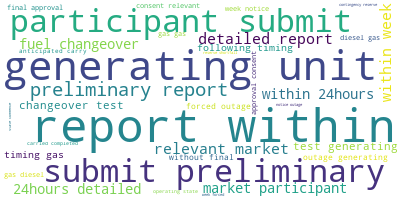

In [27]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['CONDITION_DESC'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [28]:
type(wordcloud)

wordcloud.wordcloud.WordCloud

Words ['gas', 'report', 'generating', 'unit', 'outage', 'diesel', 'detailed', 'participant', 'preliminary', 'relevant', 'submit', 'week', '24hours', 'market', 'test', 'changeover', 'fuel', 'following', 'timing', 'forced']
Count [3194.0, 2724.0, 2291.0, 2289.0, 1906.0, 1538.0, 1362.0, 1362.0, 1362.0, 1362.0, 1362.0, 1362.0, 1361.0, 1361.0, 1291.0, 1284.0, 1284.0, 1226.0, 1224.0, 948.0]


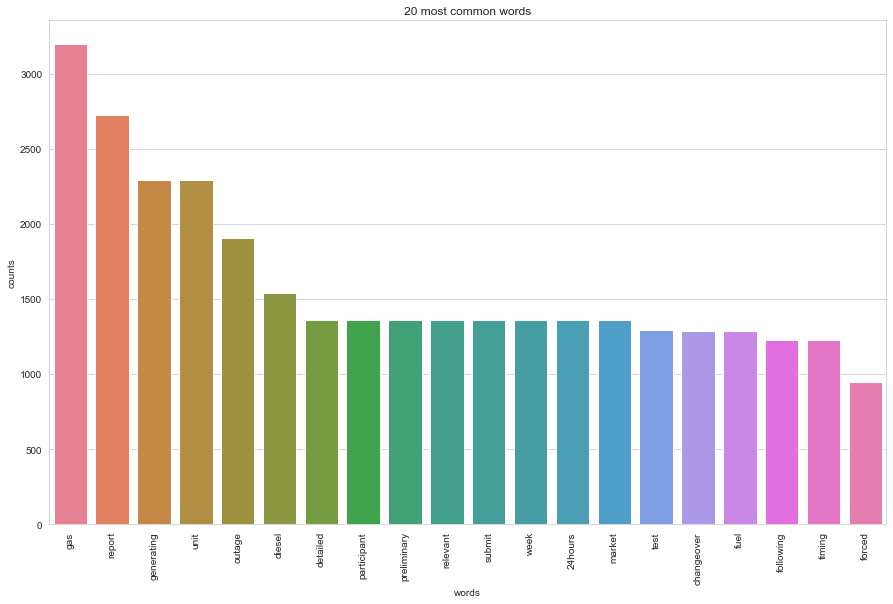

In [29]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    print('Words',words)
    counts = [w[1] for w in count_dict]
    print('Count',counts)
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['CONDITION_DESC'])
# Visualise the 10 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [30]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
stemmer = SnowballStemmer('english')

In [32]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [33]:
print('original document: ')
words = []
for word in df.CONDITION_DESC[0].split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(df.CONDITION_DESC[0]))

original document: 
['outage', 'of', 'paya', 'lebar', 'i/kaki', 'bukit', '66kv', 'feeder', 'no', '1', 'on', '02', 'jan', '2015', 'at', '1113hrs', 'was', 'without', 'final', 'approval/consent(the', 'relevant', 'market', 'participant', 'to', 'submit', 'a', 'preliminary', 'report', 'within', '24hours', '&', 'a', 'detailed', 'report', 'within', '1', 'week', 'of', 'this', 'notice)']


 tokenized and lemmatized document: 
['outag', 'paya', 'lebar', 'kaki', 'bukit', 'feeder', 'final', 'approv', 'consent', 'relev', 'market', 'particip', 'submit', 'preliminari', 'report', 'hour', 'detail', 'report', 'week', 'notic']


In [34]:
nlp = spacy.load('en_core_web_md')
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [35]:
df['COND'] = df.apply(lambda _: '', axis=1)

In [36]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    

In [37]:
df['text_lemmatized'] = df['CONDITION_DESCRIPTION'].apply(lemmatize_text)

In [38]:
df['text_lemmatized'].head()

0    [Outage, of, Paya, Lebar, I/Kaki, Bukit, 66kV,...
1    [Fuel, changeover, test, of, Generating, Unit,...
2    [Fuel, changeover, test, of, Generating, Unit,...
3    [Fuel, changeover, test, of, Generating, Unit,...
4    [Fuel, changeover, test, of, Generating, Unit,...
Name: text_lemmatized, dtype: object

In [43]:
s = ' '
df['joined_text'] = df['text_lemmatized'].apply(lambda x: s.join(x))
df['joined_text'].head

<bound method NDFrame.head of 0       Outage of Paya Lebar I/Kaki Bukit 66kV Feeder ...
1       Fuel changeover test of Generating Unit SNKCCP...
2       Fuel changeover test of Generating Unit SNKCCP...
3       Fuel changeover test of Generating Unit SER CC...
4       Fuel changeover test of Generating Unit SER CC...
                              ...                        
4447    Forced outage of generating unit KMCBLK4 at 39...
4448    Activate scheduled contingency reserve from Lo...
4449    Load interrupted can be restored with immediat...
4450    Outage of Generating Unit KMCBLK4 on 30 Dec 20...
4451    Outage of Generating Unit SNKCCP2 on 30 Dec 20...
Name: joined_text, Length: 3943, dtype: object>

In [44]:
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
df['sentiment'] = df['joined_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'][1:20]

1     0.0000
2     0.0000
3     0.0000
4     0.0000
5    -0.7184
6    -0.7184
7     0.0000
8    -0.3612
9    -0.7184
10    0.0000
11    0.0000
12   -0.4342
13    0.0000
14    0.0000
15   -0.4342
16    0.0000
17    0.0000
18   -0.2960
19    0.0000
Name: sentiment, dtype: float64

In [48]:
df['sentiment'][1:100]

1      0.0000
2      0.0000
3      0.0000
4      0.0000
5     -0.7184
        ...  
118    0.0000
120    0.0000
121   -0.3818
122    0.0000
123    0.0000
Name: sentiment, Length: 99, dtype: float64

In [55]:

import matplotlib.pyplot as plt
%matplotlib inline

#D = {u'Label1':26, u'Label2': 17, u'Label3':30}
plt.rcParams["figure.figsize"] = (288,160)
plt.legend('Sentiment Analysis')

plt.bar(range(len(df.sentiment)), df.sentiment, align='center',color = 'r')
plt.xticks(range(len(df.sentiment)), df.sentiment)

plt.xlabel('Date', fontsize =150)
plt.ylabel('Sentiment',fontsize =100)
Sentiment_Picture= plt.savefig('sentiment.jpg')
plt.show()

MemoryError: 

MemoryError: In RendererAgg: Out of memory

<Figure size 20736x11520 with 1 Axes>

In [39]:
from nltk.tokenize.toktok import ToktokTokenizer
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
tokenizer = ToktokTokenizer()
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text



In [40]:
df['COND'][i] = df['text_lemmatized'].apply(remove_stopwords)

NameError: name 'i' is not defined

In [ ]:
df.COND.head()